# SOLLDA1

### Loading Adidas dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_dir = "dataset/"
country_dim = pd.read_csv(dataset_dir + "country_dim.csv")
shoes_dim = pd.read_csv(dataset_dir + "shoes_dim.csv")
shoes_fact = pd.read_csv(dataset_dir + "shoes_fact.csv")

### Checking out the dimensions

In [60]:
country_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  4 non-null      object
 1   currency      4 non-null      object
 2   shoe_metric   4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [61]:
shoes_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3302 non-null   object
 1   name            3302 non-null   object
 2   best_for_wear   3302 non-null   object
 3   gender          3302 non-null   object
 4   image_url       3302 non-null   object
 5   dominant_color  3302 non-null   object
 6   sub_color1      3300 non-null   object
 7   sub_color2      3298 non-null   object
dtypes: object(8)
memory usage: 206.5+ KB


In [62]:
shoes_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    299156 non-null  int64  
 1   id            299156 non-null  object 
 2   price         299156 non-null  float64
 3   category      299156 non-null  object 
 4   size          299156 non-null  object 
 5   availability  299156 non-null  int64  
 6   date          299156 non-null  object 
 7   country_code  299156 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


### Merge first

In [63]:
country_dim

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


In [64]:
shoes_dim

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One
...,...,...,...,...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,Race,U,"https://assets.adidas.com/images/w_600,f_auto,...",Screaming Orange,Cloud White,Bright Blue
3298,IE6438,Run 60s Shoes Kids,Walking,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Collegiate Green,Collegiate Gold
3299,H02334,NMD_R1 Refined Shoes,Comfort,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Grey One
3300,IF1360,F50 Pro Firm Ground Cleats Kids,Outside,K,"https://assets.adidas.com/images/w_600,f_auto,...",Turbo,Aurora Black,Platinum Metallic


In [65]:
shoes_fact.rename(columns={"Unnamed: 0" : "SN"}, inplace=True)
shoes_fact

,SN,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE
...,...,...,...,...,...,...,...,...
299151,847278,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE
299152,847279,JI4476,160.0,sneakers,48,0,2025-01-16,BE
299153,847280,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE
299154,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE


In [66]:
#drop duplicates from shoes_dim, keep the first
shoes_dim.drop_duplicates(subset="id", keep="first", inplace=True)

In [67]:
shoes_fact = pd.merge(shoes_fact, shoes_dim, on="id", suffixes=('_shoes_fact', '_shoes_dim'))
shoes_fact.columns


Index(['SN', 'id', 'price', 'category', 'size', 'availability', 'date',
       'country_code', 'name', 'best_for_wear', 'gender', 'image_url',
       'dominant_color', 'sub_color1', 'sub_color2'],
      dtype='object')

In [68]:
shoes_fact

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299151,847278,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby
299152,847279,JI4476,160.0,sneakers,48,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby
299153,847280,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby
299154,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby


In [69]:
shoes_fact = pd.merge(shoes_fact, country_dim, on="country_code", suffixes=('_shoes_fact', '_country_dim'))

In [70]:
shoes_fact

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299151,847278,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby,euro,eu
299152,847279,JI4476,160.0,sneakers,48,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby,euro,eu
299153,847280,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby,euro,eu
299154,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core White,Dark Blue,Pure Ruby,euro,eu


In [71]:
#drop image_url
shoes_fact.drop( columns=["image_url"], inplace=True)

## Exploratory Data Analysis (EDA)

### EDA Questions:
##### Univariate EDA
1. Which shoe category has the most listings on the Adidas webstore?
2. Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?




### Question 1  - Which shoe category has the most listings on the Adidas webstore?

In [ ]:
#  Aggregate total availability per shoe model (id)
availability_per_id = shoes_fact.groupby('id', as_index=False)['availability'].sum()
print(availability_per_id) # remove soon

# Merge back to retain category information 
df_unique = shoes_fact[['id', 'category']].drop_duplicates()
df_merged = df_unique.merge(availability_per_id, on='id')

# Count categories weighted by total availability
category_weighted = df_merged.groupby('category')['availability'].sum().sort_values(ascending=False)

print("\nCategory Frequency Distribution (Weighted by Availability):")
print(category_weighted.to_string())


          id  availability
0     011040          2035
1     015110          3376
2     019228          2008
3     019310           364
4     033200          1217
...      ...           ...
2005  JS3050           579
2006  JS3083             9
2007  JS3222           106
2008  Q47235             0
2009  S29146           386

[2010 rows x 2 columns]

Category Frequency Distribution (Weighted by Availability):
category
running-shoes           656735
sneakers                623278
walking-shoes           502927
us/athletic_sneakers    483307
athletic_sneakers       477737
outdoor-shoes           305995
us/running-shoes        257123
us/walking-shoes        177276
tennis-shoes             75960
us/hiking-shoes          73241
hiking-shoes             73241
gym_training-shoes       71424
us/workout-shoes         53338
us/soccer-shoes          49945
occer-shoes              49936
football-shoes           19616
us/tennis-shoes          15247


In [113]:
print(shoes_fact.groupby('id')['category'].nunique().max())  # Should be 1


6


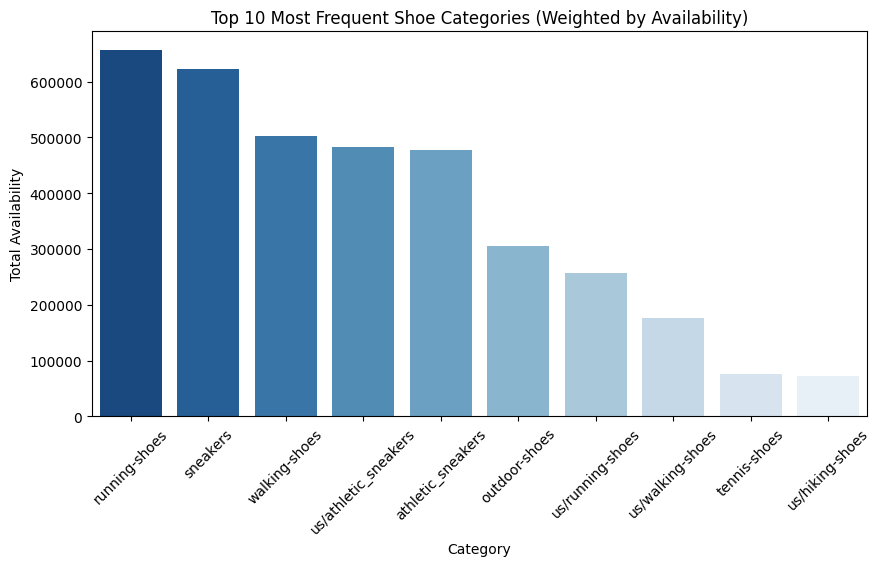

In [112]:
top_n = 10 
category_counts = category_weighted.head(top_n)  

plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, 
            y=category_counts.values, 
            hue=category_counts.index, 
            palette="Blues_r", 
            legend=False)

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Availability")
plt.title(f"Top {top_n} Most Frequent Shoe Categories (Weighted by Availability)")

plt.show()

In [76]:
category_precentage = shoes_fact['category'].value_counts(normalize=True) * 100
print(category_precentage)

category
running-shoes           26.392584
sneakers                24.962227
outdoor-shoes           14.813007
walking-shoes           10.557368
us/athletic_sneakers     6.746647
athletic_sneakers        3.406584
tennis-shoes             3.181618
gym_training-shoes       2.644440
football-shoes           1.510249
us/walking-shoes         1.389576
us/running-shoes         1.302331
us/soccer-shoes          1.266563
occer-shoes              0.689607
us/workout-shoes         0.468652
us/hiking-shoes          0.288478
hiking-shoes             0.288478
us/tennis-shoes          0.091591
Name: proportion, dtype: float64


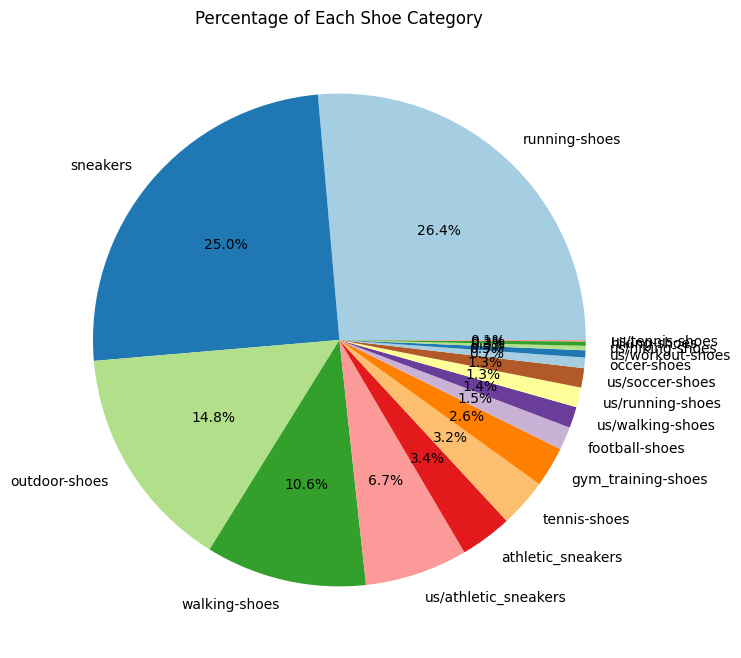

In [77]:
categories = category_precentage.index.tolist()
percentages = category_precentage.values.tolist()

plt.figure(figsize=(10, 8))
plt.pie(category_precentage, labels=category_precentage.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors)
plt.title("Percentage of Each Shoe Category")
plt.show()

### **Adidas Shoe Inventory Category Analysis**  


### Question 2 - Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?

In [95]:
# Aggregate total availability per gender
gender_counts = shoes_fact['gender'].value_counts()
availability_per_gender = shoes_fact.groupby('gender')['availability'].sum().sort_values(ascending=False)

print("\nTotal Availability per Gender:")
print(availability_per_gender.to_string())



Total Availability per Gender:
gender
U    758211
W    431651
K    426602
M    139133


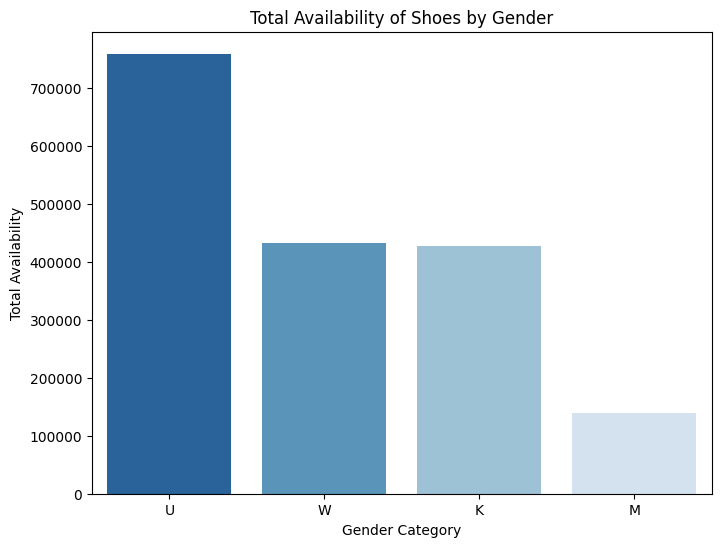

In [96]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=availability_per_gender.index, 
    y=availability_per_gender.values, 
    hue=availability_per_gender.index, 
    palette="Blues_r",
    legend=False  
)

plt.xlabel("Gender Category")
plt.ylabel("Total Availability")
plt.title("Total Availability of Shoes by Gender")
plt.show()


In [97]:
# Calculate availability percentage per gender
availability_percentage = ((availability_per_gender / availability_per_gender.sum()) * 100).round(2)

# Print availability percentages
print("\nGender Percentage Distribution (Based on Availability):")
print(availability_percentage)


Gender Percentage Distribution (Based on Availability):
gender
U    43.19
W    24.59
K    24.30
M     7.93
Name: availability, dtype: float64


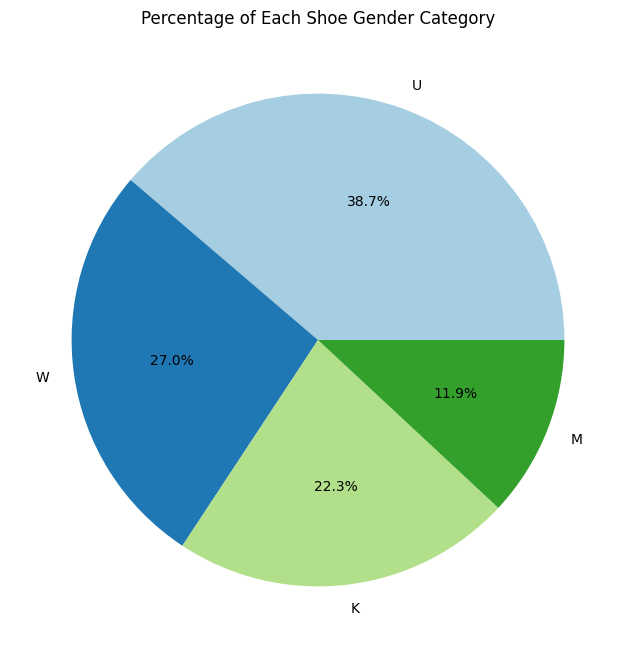

In [99]:
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired(range(len(gender_counts)))
)

plt.title("Percentage of Each Shoe Gender Category")
plt.show()

### **Gender-Based Shoe Inventory Analysis**

The Adidas webstore's shoe inventory distribution indicates that **Unisex shoes** make up the largest portion, with **758,211 entries (43.19%)**, suggesting that Adidas prioritizes versatile footwear that appeals to a broad audience.  

**Women's shoes** follow at **431,651 (24.59%)**, reflecting a significant focus on gender-specific designs for female consumers. Similarly, **Kids' shoes** account for **426,602 (24.30%)**, showing a strong market presence for children's footwear.  

**Men's shoes** represent the smallest share, with only **139,133 entries (7.93%)**, which is considerably lower than the other categories. This may indicate that Adidas places a stronger emphasis on unisex and women's footwear rather than exclusively male-oriented designs.  

Overall, the inventory distribution suggests that Adidas prioritizes **unisex and women's categories**, possibly due to broader market appeal, evolving consumer preferences, or strategic product positioning. However, further analysis, including sales data, would be necessary to determine if this distribution aligns with actual purchasing behavior.
